# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from time import gmtime, strftime
import scipy.stats as st
import datetime
from scipy.stats import linregress
import hvplot.pandas


# Impor the OpenWeatherMap API key
from api_keys_NoelleWatson import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Loop through all the cities in our list to fetch weather data

city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

      # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bintulu
Processing Record 2 of Set 1 | kangding
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | villa gesell
Processing Record 6 of Set 1 | taro
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | lawas
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | stanley
Processing Record 11 of Set 1 | olonkinbyen
Processing Record 12 of Set 1 | inari
Processing Record 13 of Set 1 | hasaki
Processing Record 14 of Set 1 | stettler
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | utrik
Processing Record 17 of Set 1 | vernon
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | invercargill
Processing Record 22 of Set 1 | trairi
Processing Record 23 of Set 1 | alba

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bintulu,3.1667,113.0333,25.23,94,40,2.24,MY,1696026243
1,kangding,30.0513,101.9603,12.00,93,77,1.15,CN,1696026244
2,bethel,41.3712,-73.4140,13.93,90,100,3.60,US,1696025551
3,puerto natales,-51.7236,-72.4875,7.79,74,100,1.08,CL,1696025767
4,villa gesell,-37.2639,-56.9730,10.59,70,74,7.58,AR,1696025875


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bintulu,3.1667,113.0333,25.23,94,40,2.24,MY,1696026243
1,kangding,30.0513,101.9603,12.00,93,77,1.15,CN,1696026244
2,bethel,41.3712,-73.4140,13.93,90,100,3.60,US,1696025551
3,puerto natales,-51.7236,-72.4875,7.79,74,100,1.08,CL,1696025767
4,villa gesell,-37.2639,-56.9730,10.59,70,74,7.58,AR,1696025875


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

2023-09-29


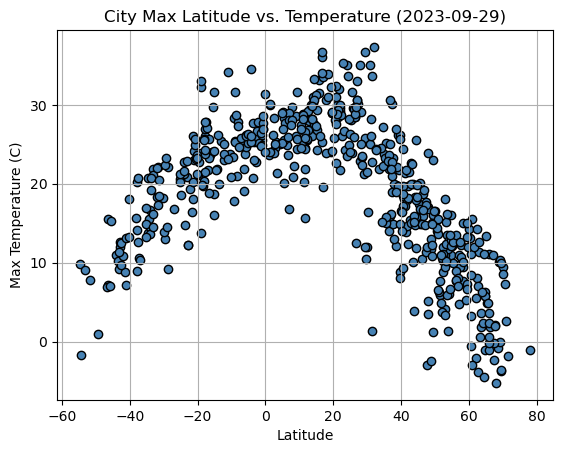

In [8]:
# Getting current date/time
current_date = strftime("%Y-%m-%d", gmtime())
print(current_date)
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', facecolor='steelblue', edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Max Latitude vs. Temperature ({current_date})')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

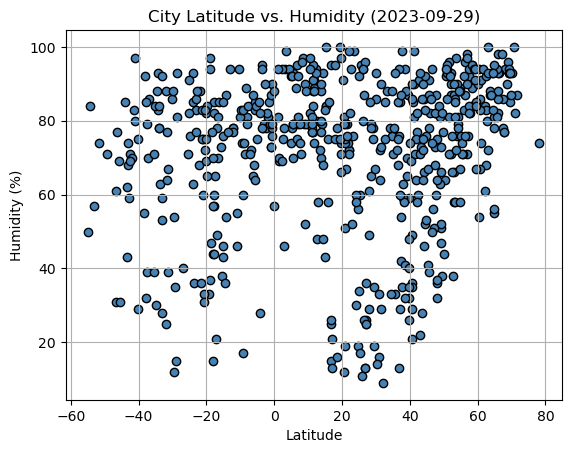

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', facecolor='steelblue', edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({current_date})')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

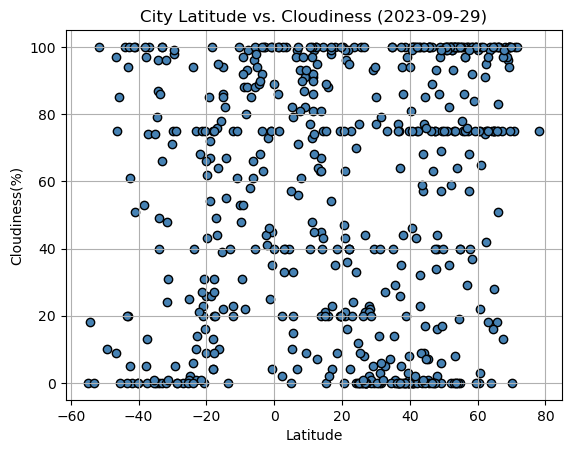

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', facecolor='steelblue', edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title(f'City Latitude vs. Cloudiness ({current_date})')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

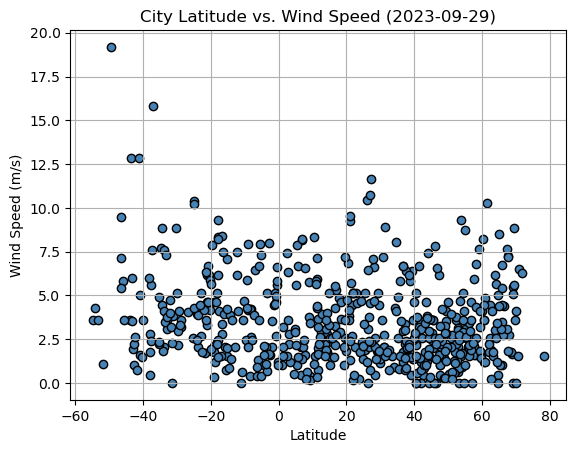

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', facecolor='steelblue', edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed ({current_date})')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
def linear_regression_plot(x_values, y_values): 
     # Perform linear regression
    correlation_coef = st.pearsonr(x_values, y_values)
    print(f"The r-value is: {correlation_coef[0]}") 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Plot the original data points
    plt.scatter(x_values,y_values, marker='o', facecolor='steelblue', edgecolors='black')
    # Plot the regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    # Add labels and a legend
    plt.xlabel('Latitiude')
    plt.ylabel('')
    # Show the plot
    plt.show()
    


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0] 

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bintulu,3.1667,113.0333,25.23,94,40,2.24,MY,1696026243
1,kangding,30.0513,101.9603,12.00,93,77,1.15,CN,1696026244
2,bethel,41.3712,-73.4140,13.93,90,100,3.60,US,1696025551
7,lawas,13.7640,121.0566,26.05,88,67,2.38,PH,1696026245
9,stanley,54.8680,-1.6985,10.99,89,0,3.09,GB,1696025813


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0] 

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto natales,-51.7236,-72.4875,7.79,74,100,1.08,CL,1696025767
4,villa gesell,-37.2639,-56.9730,10.59,70,74,7.58,AR,1696025875
5,taro,-8.3862,115.2800,21.03,89,80,0.37,ID,1696026244
6,port elizabeth,-33.9180,25.5701,16.72,78,0,2.06,ZA,1696025806
8,ushuaia,-54.8000,-68.3000,9.81,50,0,3.60,AR,1696025747


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8228454422943191


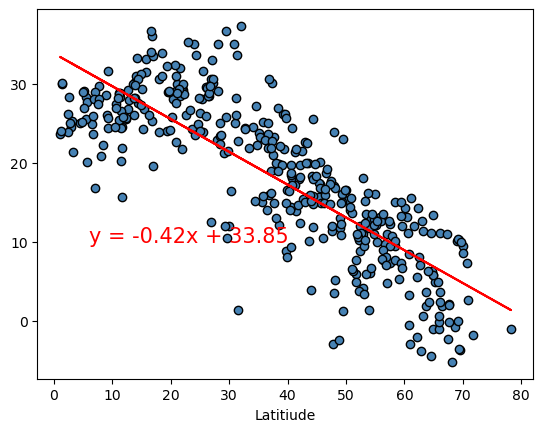

In [15]:
# Linear regression on Northern Hemisphere
from pyparsing import line_end


lat_north = northern_hemi_df['Lat']
max_temp_north= northern_hemi_df['Max Temp']

linear_regression_plot(lat_north, max_temp_north)



The r-value is: 0.8085684789961329


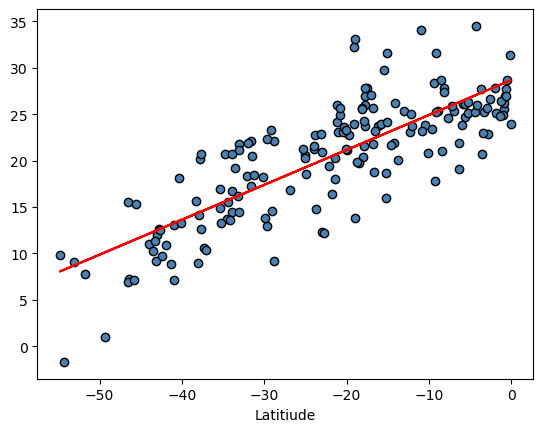

In [16]:
# Linear regression on Southern Hemisphere
lat_south = southern_hemi_df['Lat']
max_temp_south= southern_hemi_df['Max Temp']

linear_regression_plot(lat_south, max_temp_south)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.14511951954265365


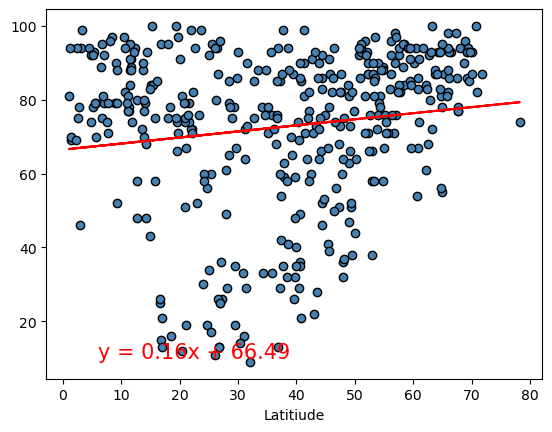

In [17]:
# Northern Hemisphere
lat_north = northern_hemi_df['Lat']
humidity_north= northern_hemi_df['Humidity']

linear_regression_plot(lat_north, humidity_north)

The r-value is: 0.1852844222831234


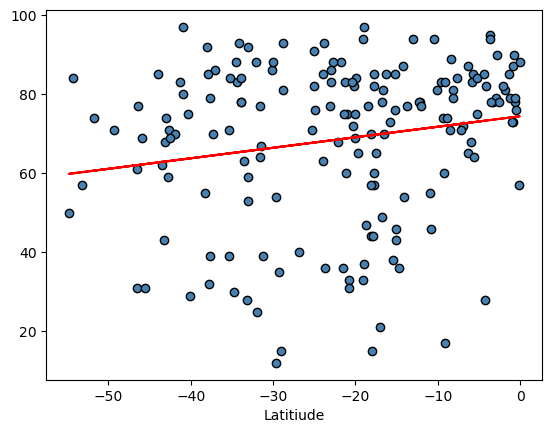

In [18]:
# Southern Hemisphere
lat_south = southern_hemi_df['Lat']
humidity_south= southern_hemi_df['Humidity']

linear_regression_plot(lat_south, humidity_south)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.16799966902804006


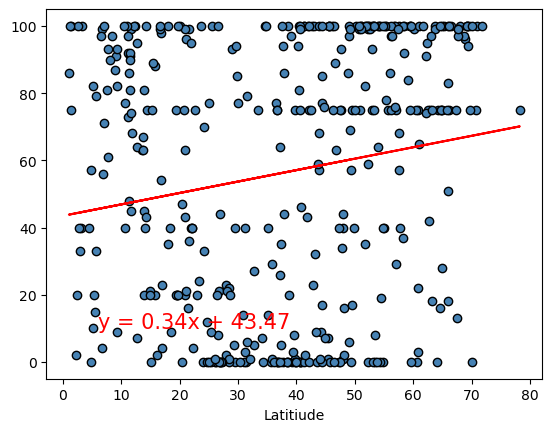

In [19]:
# Northern Hemisphere
lat_north = northern_hemi_df['Lat']
cloudiness_north= northern_hemi_df['Cloudiness']

linear_regression_plot(lat_north, cloudiness_north)

The r-value is: 0.2462751743935822


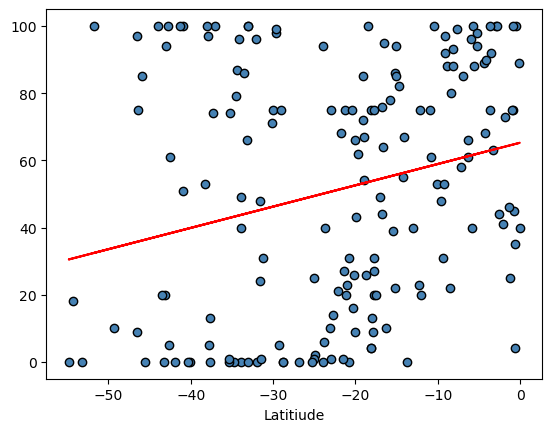

In [20]:
# Southern Hemisphere
lat_south = southern_hemi_df['Lat']
cloudiness_south= southern_hemi_df['Cloudiness']

linear_regression_plot(lat_south, cloudiness_south)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.024354781932667456


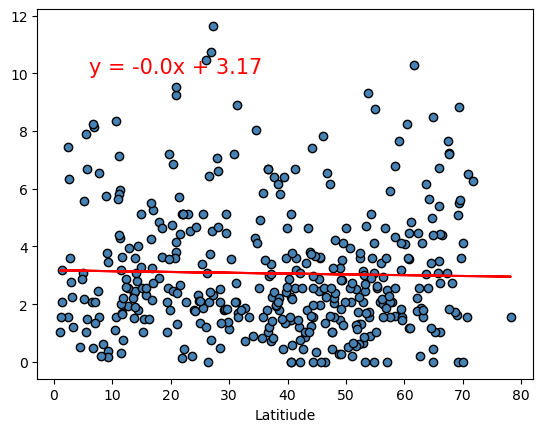

In [21]:
# Northern Hemisphere
lat_north = northern_hemi_df['Lat']
windspeed_north= northern_hemi_df['Wind Speed']

linear_regression_plot(lat_north, windspeed_north)

The r-value is: -0.18654154781157922


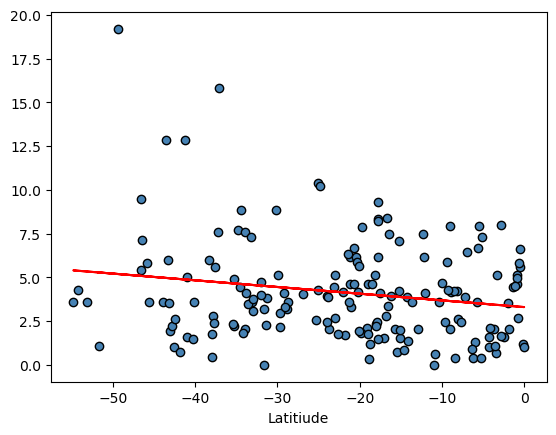

In [22]:
# Southern Hemisphere
lat_south = southern_hemi_df['Lat']
windspeed_south= southern_hemi_df['Wind Speed']

linear_regression_plot(lat_south, windspeed_south)

**Discussion about the linear relationship:** YOUR RESPONSE HERE